
<h1 style = 'text-align:center'>MIDTERM EXAM PROJECT<br>CHICAGO CRIMES DATA ANALYTICS PROJECT <br>RESTRUCTURED DATA (2024 - 2025 ONLY)</h1>
<hr>
<h4 style = 'color:gray'>ANALYST - LOUIEZZY RAMOS </h4>

<h1 style="text-align:center; color:blue;">PROJECT SUMMARY</h1>

<h4 style="color:gray;">
    I. Total Crimes: 2024 vs 2025 <br>
    II. Year 2024  
    <br>&nbsp;&nbsp;&nbsp; a. Monthly Crime Numbers <br>
    &nbsp;&nbsp;&nbsp; b. Crime List  <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Top 10 Types of Crimes <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -10 Least Common Types of Crimes <br>
    IV. Arrest Rate by Year
    <br>&nbsp;&nbsp;&nbsp; a.Top 15 Crime Types by Arrest Rate <br>
    V. Crime Distribution by District
    <br>&nbsp;&nbsp;&nbsp; a. <br>
    
</h4>

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>DATABASE - RESTRUCTURED DATA (2024 - 2025 ONLY) <h1>
<hr>

In [2]:
cf = pd.read_csv("datasets//Chicago_Crimes.csv")

In [3]:
cf.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<h1>FILLING UP NULL VALUES</h1>
<hr>

<h1>Main set of null values:</h1>

In [4]:
cf.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3 style = 'color:gray'>There are 7 columns to fill up; [Location Description, Community Area, X Coordinate, Y Coordinate, Latitude, Longitude, Location] Now, we're going to fill up the null values using the code below. </h3>

In [5]:
cf ['Location Description'] =  cf['Location Description'].fillna(cf['Location Description'].mode()[0])
cf ['Community Area'] =  cf['Community Area'].fillna(cf['Community Area'].mode()[0])
cf ['X Coordinate'] =  cf['X Coordinate'].fillna(cf['X Coordinate'].mode()[0])
cf ['Y Coordinate'] =  cf['Y Coordinate'].fillna(cf['Y Coordinate'].mode()[0])
cf ['Latitude'] =  cf['Latitude'].fillna(cf['Latitude'].mode()[0])
cf ['Longitude'] =  cf['Longitude'].fillna(cf['Longitude'].mode()[0])
cf ['Location'] =  cf['Location'].fillna(cf['Location'].mode()[0])
cf.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>CHECK DATA TYPES ---> Then CHANGE DATA TYPES </h1>
<hr>

In [6]:
cf.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
cf ['Case Number'] = cf['Case Number'].astype('category')
cf ['Date'] = cf['Date'].astype('str')
cf ['Block'] = cf['Block'].astype('category')
cf ['IUCR'] = cf['IUCR'].astype('category')
cf ['Primary Type'] = cf['Primary Type'].astype('category')
cf ['Description'] = cf['Description'].astype('category')
cf ['Location Description'] = cf['Location Description'].astype('category')
cf ['FBI Code'] = cf['FBI Code'].astype('category')
cf ['Updated On'] = cf['Updated On'].astype('category')
cf ['Location'] = cf['Location'].astype('category')
cf.dtypes

ID                         int64
Case Number             category
Date                      object
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area           float64
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
dtype: object

In [8]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
cf['Date'] = cf['Date'].str.strip()

cf['Date'] = cf['Date'].astype('str')

cf['Date'] = cf['Date'].str.replace('/', '-')

cf['Date'] = pd.to_datetime(cf['Date'], dayfirst = True, errors = 'coerce')

In [10]:
cf.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
dtype: object

In [11]:
cf['Date'] = pd.to_datetime(cf['Date'], dayfirst=True, errors='coerce')

cf['Year'] =  cf['Date'].dt.year
cf['Month'] =  cf['Date'].dt.month
cf['Day'] =  cf['Date'].dt.day
cf['DayOfWeek'] =  cf['Date'].dt.dayofweek


In [12]:
cf.describe()

,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,DayOfWeek
count,2.491230e+05,249123,249123.000000,249123.000000,249123.000000,249123.000000,2.491230e+05,2.491230e+05,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000
mean,1.358652e+07,2024-09-29 02:28:42.947460352,1153.845634,11.308924,23.186823,36.238424,1.165313e+06,1.887590e+06,2024.241668,41.847129,-87.668871,6.536936,15.820001,2.993971
min,2.807300e+04,2024-01-05 00:00:00,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567,1.000000,1.000000,0.000000
25%,1.352322e+07,2024-06-13 01:36:30,533.000000,5.000000,10.000000,22.000000,1.153987e+06,1.860533e+06,2024.000000,41.772686,-87.710096,4.000000,8.000000,1.000000
50%,1.361560e+07,2024-09-16 11:19:00,1034.000000,10.000000,23.000000,32.000000,1.167193e+06,1.894259e+06,2024.000000,41.865584,-87.661716,7.000000,16.000000,3.000000
75%,1.370865e+07,2024-12-28 18:20:00,1732.000000,17.000000,34.000000,53.000000,1.176659e+06,1.910282e+06,2024.000000,41.909691,-87.627241,9.000000,23.000000,5.000000
max,1.381045e+07,2025-12-04 00:00:00,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531,12.000000,31.000000,6.000000
std,6.473192e+05,NaN,707.959752,7.074807,13.925951,21.567390,1.616658e+04,3.146368e+04,0.428095,0.086519,0.058880,3.362766,8.707056,1.998897


<hr> 
<hr> <h1 style="text-align:center; color:blue;">I. Total Crimes: 2024 vs 2025</h1>


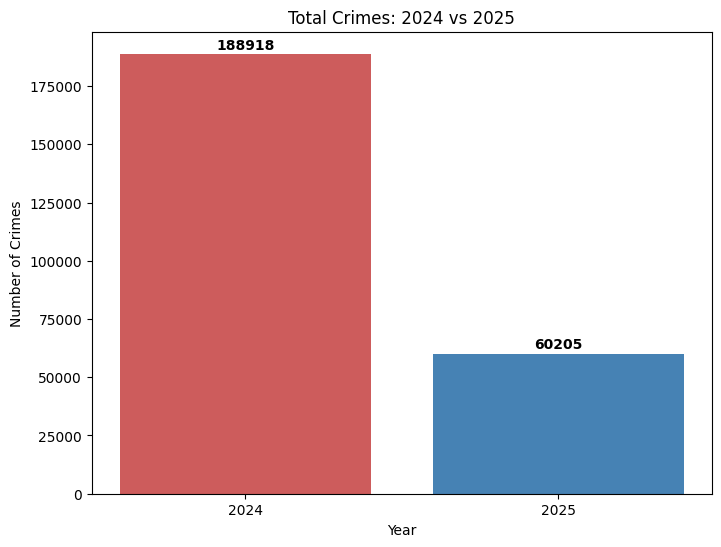

In [13]:
crime_2024 = cf[cf["Year"] == 2024].shape[0]
crime_2025 = cf[cf["Year"] == 2025].shape[0]

# Prepare data for bar chart
crime_counts = [crime_2024, crime_2025]
labels = ["2024", "2025"]

# Plot bar chart
plt.bar(labels, crime_counts, color=["indianred", "steelblue"])
plt.gcf().set_size_inches(8, 6)
plt.title("Total Crimes: 2024 vs 2025")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")

for i, v in enumerate(crime_counts):
    plt.text(i, v + 2000, str(v), ha='center', fontweight='bold')

plt.show()

<h3 style="color:gray">INSIGHT 1: In 2024, a notably high number of crimes were recorded (188,918 cases, accounting for about 76% of the total), which was significantly greater than the following year. This may point to either more comprehensive reporting in 2024 or an actual increase in criminal activity.</h3>


<h3 style="color:gray">
    INSIGHT 2: Since 2025 is still in progress, the dataset may not yet cover all months, with 60,205 crimes (about 24% of total cases so far). This makes the yearly total appear smaller compared to 2024. Reported crimes in 2025 are roughly 68% lower than in 2024, a drop that could indicate either improved law enforcement efforts or incomplete data for the year.</h3>


<h3 style="color:gray">
    INSIGHT 3: According to the database, Chicago recorded a combined total of 249,123 crimes across 2024 and 2025. Of this, 2024 accounted for the majority with 188,918 cases (76%), while 2025 has reported 60,205 cases so far (24%). The sharp decline in 2025 may reflect either ongoing improvements in crime prevention </h3>
<hr> 

<hr>
<h1 style="text-align:center; color:blue;">II. Year 2024</h1>
<h2>
    a. Monthly Crime Numbers in 2024 <br>
</h2>

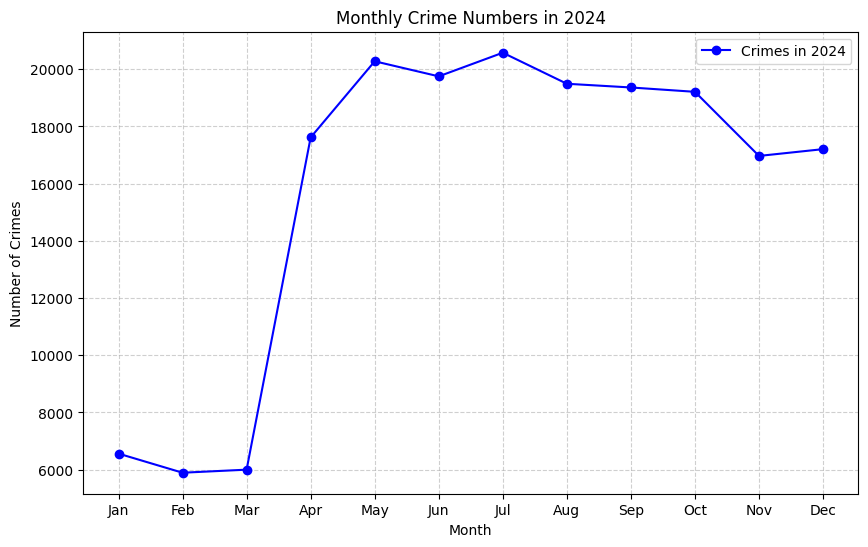

In [14]:

cf["Date"] = pd.to_datetime(cf["Date"], errors="coerce")

#Get 2024 result only! 
cf_2024 = cf[cf["Year"] == 2024]


monthly_2024 = cf_2024.groupby(cf_2024["Date"].dt.month).size()


plt.figure(figsize=(10,6))
plt.plot(monthly_2024.index, monthly_2024.values, marker='o', linestyle='-', color='blue', label="Crimes in 2024")


plt.title("Monthly Crime Numbers in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")


plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h3 style="color:gray">INSIGHT 3 - OVERALL
    : From January to March, there was minimal crime (about 6,000 each month), but in April, there was an abrupt rise to over 17,000, which was almost three times as much as in the previous months.  Seasonal variations or changes in reporting procedures may be the cause of this spike. </h3>
<hr> 

<h3 style="color:gray">INSIGHT 4 - SUMMER PEAK: While activity was constantly high from May to July, crime peaked in July with over 20,000 (about 10.6%) incidents, confirming research showing that crime tends to rise in the summer months due to an increase in outside activity and social engagement. </h3>
<hr> 

<hr>
<h2>
    b. Crime List in 2024 <br>
</h2>

In [15]:
crime_list = cf['Primary Type'].unique()


crime_list_sorted = sorted(crime_list)


for crime in crime_list_sorted:
    print(crime)

ARSON
ASSAULT
BATTERY
BURGLARY
CONCEALED CARRY LICENSE VIOLATION
CRIMINAL DAMAGE
CRIMINAL SEXUAL ASSAULT
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
GAMBLING
HOMICIDE
HUMAN TRAFFICKING
INTERFERENCE WITH PUBLIC OFFICER
INTIMIDATION
KIDNAPPING
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
NARCOTICS
NON-CRIMINAL
OBSCENITY
OFFENSE INVOLVING CHILDREN
OTHER NARCOTIC VIOLATION
OTHER OFFENSE
PROSTITUTION
PUBLIC INDECENCY
PUBLIC PEACE VIOLATION
ROBBERY
SEX OFFENSE
STALKING
THEFT
WEAPONS VIOLATION


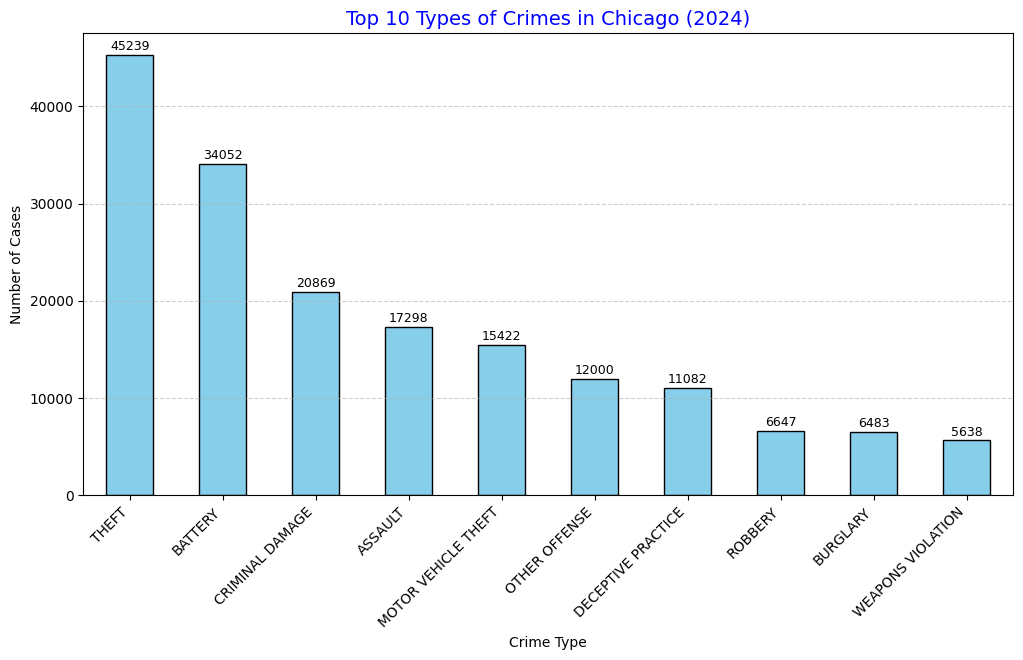

In [16]:
#Get 2024 result only! 
cf_2024 = cf[cf['Year'] == 2024]


crime_types_2024 = cf_2024['Primary Type'].value_counts()

#NOTE: If you want to know the "most" number, use the ".head()" --> crime_types_2024.head(10)
plt.figure(figsize=(12,6))
crime_types_2024.head(10).plot(kind='bar', color='skyblue', edgecolor='black')


plt.title("Top 10 Types of Crimes in Chicago (2024)", fontsize=14, color="blue")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.6)


for i, value in enumerate(crime_types_2024.head(10).values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=9)

plt.show()

<h3 style="color:gray">
    INSIGHT 5 - THEFT DOMINATION: With 45,239 occurrences reported, theft is clearly the most common crime in Chicago in 2024.  It represents nearly all of all cases, reflecting the city's constant property crime issue, which is frequently connected to financial difficulties.
</h3>

<h3 style="color:gray">
    INSIGHT 6 - PHYSICAL VIOLENCE: Chicago has always suffered with high violent crime rates, which usually occur in specific neighborhoods.  In total, assault (17,298 attacks) and battery (34,052 cases) totaled over 50,000 incidents in 2024.  These numbers highlight persistent problems with interpersonal violence.
</h3>
<hr>


<h2 style="color:blue">
   - - GEOMAP - -

</h2>
<h3 style="color:gray">
     &nbsp;&nbsp;&nbsp;THEFT DOMINATION
</h3>

In [21]:
theft_2024 = cf_2024[(cf_2024['Year'] == 2024) & (cf_2024['Primary Type'] == "THEFT")]


theft_df = theft_2024.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')


theft_df['normalized_weight'] = (theft_df['incident_count'] - theft_df['incident_count'].min()) / \
                                (theft_df['incident_count'].max() - theft_df['incident_count'].min())


theft_list = theft_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()


theft_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)


HeatMap(theft_list, radius=10, blur=15, max_zoom=13).add_to(theft_map)

theft_map.save('theft_2024_heatmap.html')

theft_map

<h3 style="color:gray">
    INSIGHT 7: The map above reveals hotspots where theft incidents cluster. The central part of Chicago (Loop area) glows the hottest, it reflects increased theft risk in business and tourist-heavy areas.
</h3>

<hr> 
<h3 style="color:blue">Since we got to know about the TOP 10 TYPES OF CRIME IN CHICAGO (2024) 
    <br> <br>Here's the 10 LEAST COMMON TYPE OF CRIMES IN CHICAGO (2024)</h3>

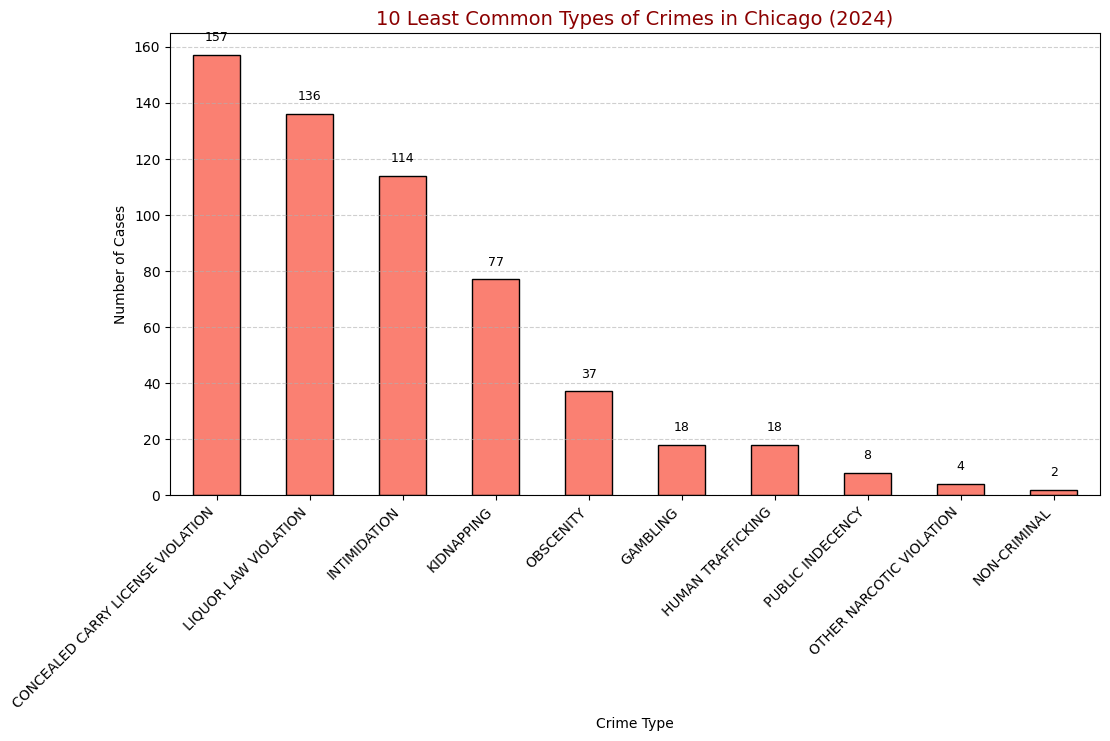

In [18]:
# Get 2024 result only
cf_2024 = cf[cf['Year'] == 2024]


crime_types_2024 = cf_2024['Primary Type'].value_counts()

#NOTE: If you want to know the "least" number, use the ".tail()" --> crime_types_2024.tail(10)
plt.figure(figsize=(12,6))
crime_types_2024.tail(10).plot(kind='bar', color='salmon', edgecolor='black')

plt.title("10 Least Common Types of Crimes in Chicago (2024)", fontsize=14, color="darkred")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.6)

for i, value in enumerate(crime_types_2024.tail(10).values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=9)

plt.show()

<h3 style="color:gray">
    INSIGHT 8 - NON-CRIMINAL: In Chicago's 2024 statistics, "Non-Criminal" cases are almost minor, with only 2 instances documented.  This implies that nearly all of the reports that law enforcement handles are related to specific criminal offenses, with extremely few instances being recorded but not being considered crimes.
</h3>

<h3 style="color:gray">
    INSIGHT 9: Liquor-Law Violations (136 instances), Concealed Carry License Violations (157 cases), and Obscenity (37 cases) were among the top 10 least common.  Compared to violent crimes, these offenses are more related to social behavior and regulatory issues, suggesting that enforcement in these areas is probably more selective and situational.
</h3>
<hr>

<h2 style="color:blue">
   - - GEOMAP - -

</h2>
<h3 style="color:gray">
     &nbsp;&nbsp;&nbsp;CONCEALED CARRY LICENSE VIOLATION
</h3>

In [30]:
cclv_2024 = cf_2024[(cf_2024['Year'] == 2024) & 
                    (cf_2024['Primary Type'] == "CONCEALED CARRY LICENSE VIOLATION")]

# Group by coordinates and count incidents
cclv_df = cclv_2024.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')

# Normalize the weights for heatmap intensity
cclv_df['normalized_weight'] = (cclv_df['incident_count'] - cclv_df['incident_count'].min()) / \
                               (cclv_df['incident_count'].max() - cclv_df['incident_count'].min())

# Convert to list of [Latitude, Longitude, Weight]
cclv_list = cclv_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

# Create the base map centered on Chicago
cclv_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add the heatmap layer
HeatMap(cclv_list, radius=10, blur=15, max_zoom=13).add_to(cclv_map)

# Save and display the map
cclv_map.save('cclv_2024_heatmap.html')

cclv_map

<h3 style="color:gray">
    INSIGHT 10: This implies that concealed carry offenses are more common in areas with a high population or substantial amount of travel, possibly close to tourist places, transit hubs where there is a greater presence of law enforcement.
</h3>
<hr>

<hr>
<h1 style="text-align:center; color:blue;">III. Year 2025</h1>

<h2>
    a. Monthly Crime Numbers in 2025 <br>
</h2>

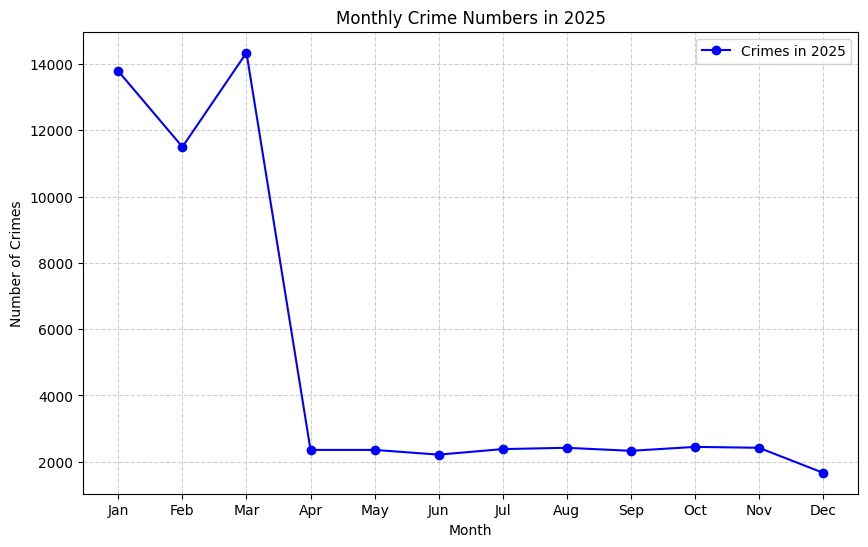

In [37]:


cf["Date"] = pd.to_datetime(cf["Date"], errors="coerce")

cf_2025 = cf[cf["Year"] == 2025]

monthly_2025 = cf_2025.groupby(cf_2025["Date"].dt.month).size()


plt.figure(figsize=(10,6))
plt.plot(monthly_2025.index, monthly_2025.values, marker='o', linestyle='-', color='blue', label="Crimes in 2025")

plt.title("Monthly Crime Numbers in 2025")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<h3 style="color:gray">
    INSIGHT 11: An exceptionally high concentration of crimes is seen in the first three months, particularly in March, when over 14,000 events were reported.
</h3>

<h3 style="color:gray">
    INSIGHT 12 - 2024 vs 2025: In contrast to 2024, when crime activity rapidly climbed from March to July, the average monthly crime rate in 2025 is 70–80% lower.  The exact reverse happened in 2025, though, when the number of crimes fell to less than 2,500 every month after March.
</h3>

In [38]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

<hr>
<h1 style="text-align:center; color:blue;">IV. Arrest Rate by Year</h1>

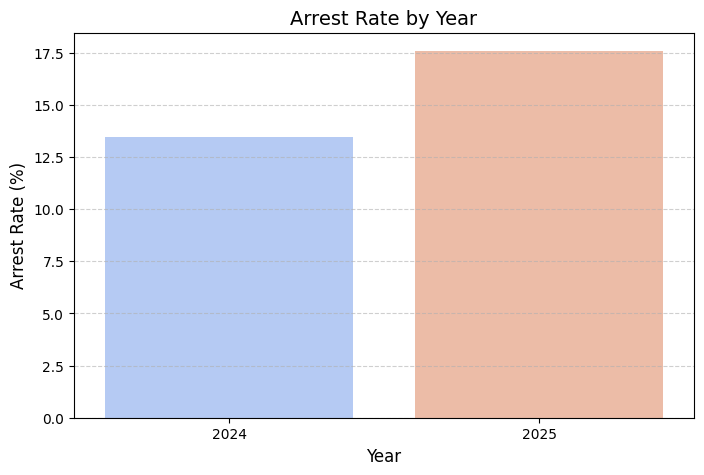

In [51]:
# Ensure Date and Year columns exist
cf['Date'] = pd.to_datetime(cf['Date'], errors='coerce')
cf['Year'] = cf['Date'].dt.year

# Arrest counts grouped by year
arrest_by_year = cf.groupby('Year')['Arrest'].mean().reset_index()
arrest_by_year['Arrest'] = arrest_by_year['Arrest'] * 100  # convert to percentage

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=arrest_by_year, x='Year', y='Arrest', palette='coolwarm')
plt.title("Arrest Rate by Year", fontsize=14)
plt.ylabel("Arrest Rate (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h3 style="color:gray">
    INSIGHT 13: According to the graph above, about 13–14% of reported offenses resulted in an arrest in 2024, compared to roughly 17–18% in 2025.
 This suggests that enforcement effectiveness has improved by about 30%, meaning that in 2025, police were more likely to make arrests in response to recorded offenses.
</h3>

<h2>
    a. Top 15 Crime Types by Arrest Rate<br>
</h2>

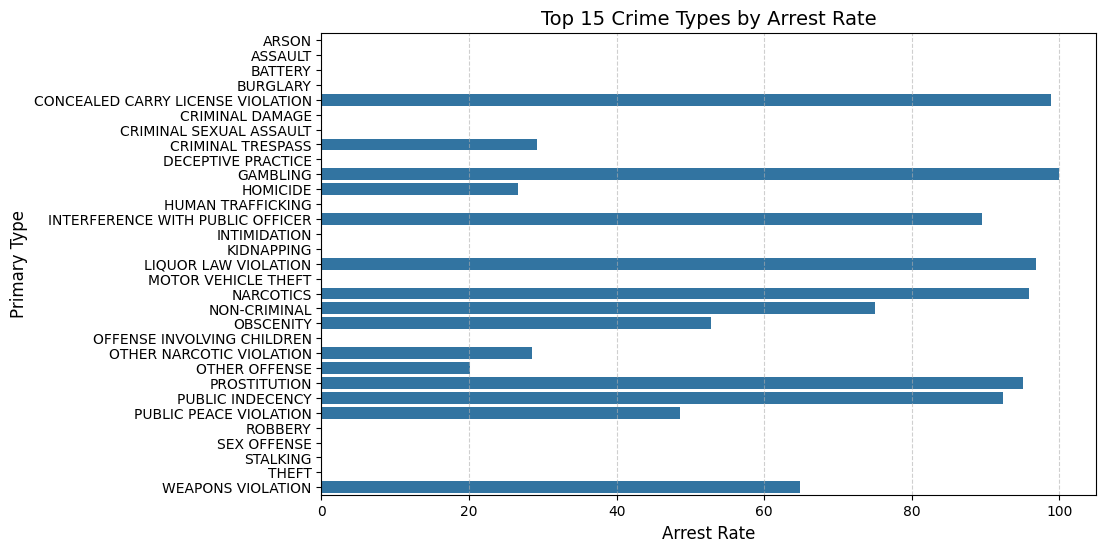

In [47]:
arrest_rate_by_type = cf.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=arrest_rate_by_type.values * 100, y=arrest_rate_by_type.index)
plt.title("Top 15 Crime Types by Arrest Rate", fontsize=14)
plt.xlabel("Arrest Rate", fontsize=12)
plt.ylabel("Primary Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<h3 style="color:gray">
    INSIGHT 14 : Arrest rates for crimes including homicide, intimidation, weapons violations, and concealed carry license violations are almost 100%, showing that law enforcement prioritizes dealing with dangerous and serious situations that endanger public safety.  These kinds of crimes are usually simpler to verify and frequently include circumstances in which law enforcement can react and make an arrest very away.
</h3>

<h3 style="color:gray">
    INSIGHT 15: With arrest rates between 20% and 50%, crimes including theft, deceptive practice (fraud), and criminal trespass have far lower rates.  There is a need for better investigative techniques and resource allocation to improve case resolution in these locations because these offenses are frequently reported later an incident, lack sufficient proof, or involve unidentified individuals.
</h3>

<hr>
<h1 style="text-align:center; color:blue;">V. Crime Distribution by District</h1>

In [49]:
cf['District'].value_counts().sort_index()

District
1     14409
2     12848
3     12545
4     13318
5      9883
6     14157
7     10520
8     16691
9     10910
10    10133
11    13423
12    15355
14     9341
15     8605
16     8570
17     7801
18    13118
19    13640
20     5362
22     7710
24     8101
25    12664
31       19
Name: count, dtype: int64

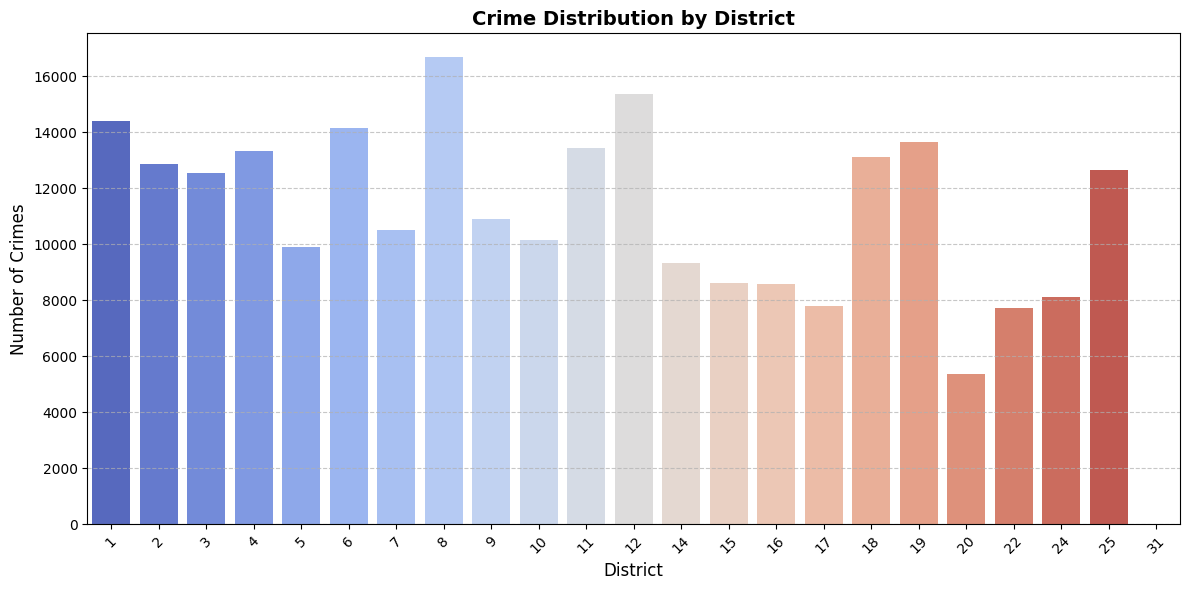

In [48]:
district_crime = cf.dropna(subset=['District'])

# Group by District and count the number of crimes
district_counts = district_crime['District'].value_counts().reset_index()
district_counts.columns = ['District', 'Crime_Count']

# Sort by district number
district_counts = district_counts.sort_values('District')

# Set up plot style
plt.figure(figsize=(12,6))
sns.barplot(data=district_counts, x='District', y='Crime_Count', palette='coolwarm')

# Add labels and title
plt.title("Crime Distribution by District", fontsize=14, weight='bold')
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

<h3 style="color:gray">
    INSIGHT 16:
</h3>

<ul>
    <li>District 8 – Chicago Lawn</li>
</ul>

<p>
    District 8 has the most crimes (about 16,691), which is far higher than the citywide average. 
    This indicates that Chicago Lawn faces ongoing crime challenges, likely linked to its 
    large residential population and close proximity to major transportation routes, 
    which can increase both crime opportunities and policing complexity.
</p>


<h3 style="color:gray">
    INSIGHT 17:
</h3>

<ul>
    <li>District 17 – Albany Park</li>
    <li>District 20 – Lincoln</li>
</ul>

<p>
    These districts report the lowest crime volumes among all areas. 
    District 20 recorded only 5,362 offenses, while District 17 remained below 8,000 crimes. 
    Their relatively low crime rates may be attributed to being primarily residential zones with quieter environments, 
    limited commercial activity, and lower population density. 
    This suggests that community stability and residential zoning play key roles in reducing crime prevalence.
</p>


<h3 style="color:gray">
    INSIGHT 18:
</h3>

<ul>
    <li>District 1 – Central (Downtown)</li>
    <li>District 6 – Gresham</li>
    <li>District 11 – Harrison</li>
    <li>District 12 – Near West</li>
    <li>District 18 – Near North</li>
    <li>District 19 – Town Hall</li>
</ul>

<p>
    These districts all report between 13,000–15,000 crimes each. 
    This trend suggests that both central business zones and densely populated residential areas 
    experience consistent levels of criminal activity — likely influenced by 
    high population density, active nightlife, and economic activity 
    that attract both offenders and potential victims.
</p>
